**LetsGrowMore (LGMVIP) - "DATA SCIENCE INTERN"**

**LGMVIP August-23**

**AUTHOR - NIKHIL ESHWAR**

Advanced Level Task

TASK-7- Develop A Neural Network That Can Read Handwriting :

Begin my neural network machine learning project with the MNIST Handwritten Digit Classification Challenge and using Tensorflow and CNN. It has a very user-friendly interface that’s ideal for beginners.


Dataset link : https://en.wikipedia.org/wiki/MNIST_database

Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,Activation
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
%matplotlib inline

Loading the Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

Displaying sample Images

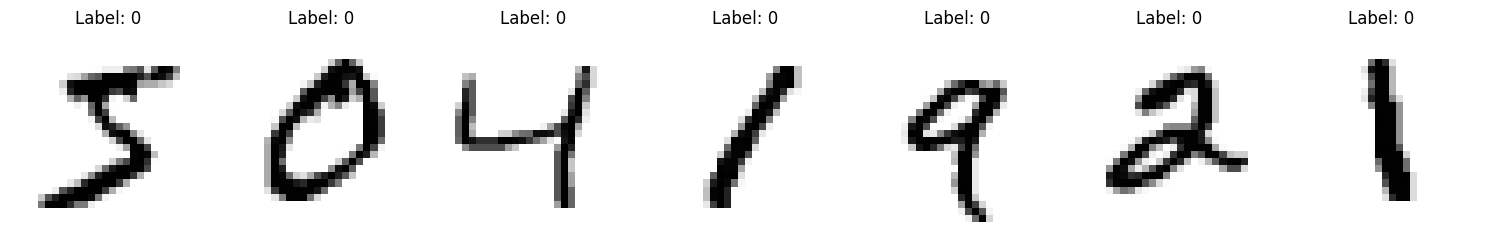

In [28]:
num_images_to_display = 7
fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 3))
for i in range(num_images_to_display):
    axes[i].imshow(x_train[i], cmap='gray_r')
    axes[i].set_title(f'Label: {np.argmax(y_train[i])}')
    axes[i].axis('off')

plt.tight_layout()

Pre-processing the Data

In [5]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

Applying Normalization

In [6]:
x_train=x_train/255.0
x_testg=x_test/255.0
num_classes = 10

Model Building

In [7]:
model = Sequential()

model.add(Conv2D(128, kernel_size=(3, 3),
                 activation=tf.nn.relu,
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(32, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation=tf.nn.softmax))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 128)      512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 26, 26, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        73792     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 64)        0

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(x=x_train,y=y_train,validation_split=0.1,epochs=10)

Epoch 1/10
1688/1688 [==============================] - 865s 511ms/step - loss: 0.2648 - accuracy: 0.9235 - val_loss: 0.0790 - val_accuracy: 0.9792
Epoch 2/10
1688/1688 [==============================] - 817s 484ms/step - loss: 0.1123 - accuracy: 0.9677 - val_loss: 0.0881 - val_accuracy: 0.9800
Epoch 3/10
1688/1688 [==============================] - 811s 480ms/step - loss: 0.0816 - accuracy: 0.9761 - val_loss: 0.0758 - val_accuracy: 0.9857
Epoch 4/10
1688/1688 [==============================] - 812s 481ms/step - loss: 0.0739 - accuracy: 0.9784 - val_loss: 0.1545 - val_accuracy: 0.9728
Epoch 5/10
1688/1688 [==============================] - 819s 485ms/step - loss: 0.0652 - accuracy: 0.9806 - val_loss: 0.0835 - val_accuracy: 0.9852
Epoch 6/10
1688/1688 [==============================] - 816s 484ms/step - loss: 0.0571 - accuracy: 0.9836 - val_loss: 0.1181 - val_accuracy: 0.9820
Epoch 7/10
1688/1688 [==============================] - 820s 486ms/step - loss: 0.0523 - accuracy: 0.9849 - val_

In [10]:
loss_and_acc=model.evaluate(x_test,y_test)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

313/313 [==============================] - 29s 92ms/step - loss: 5.0952 - accuracy: 0.9821
Test Loss 5.095174312591553
Test Accuracy 0.9821000099182129


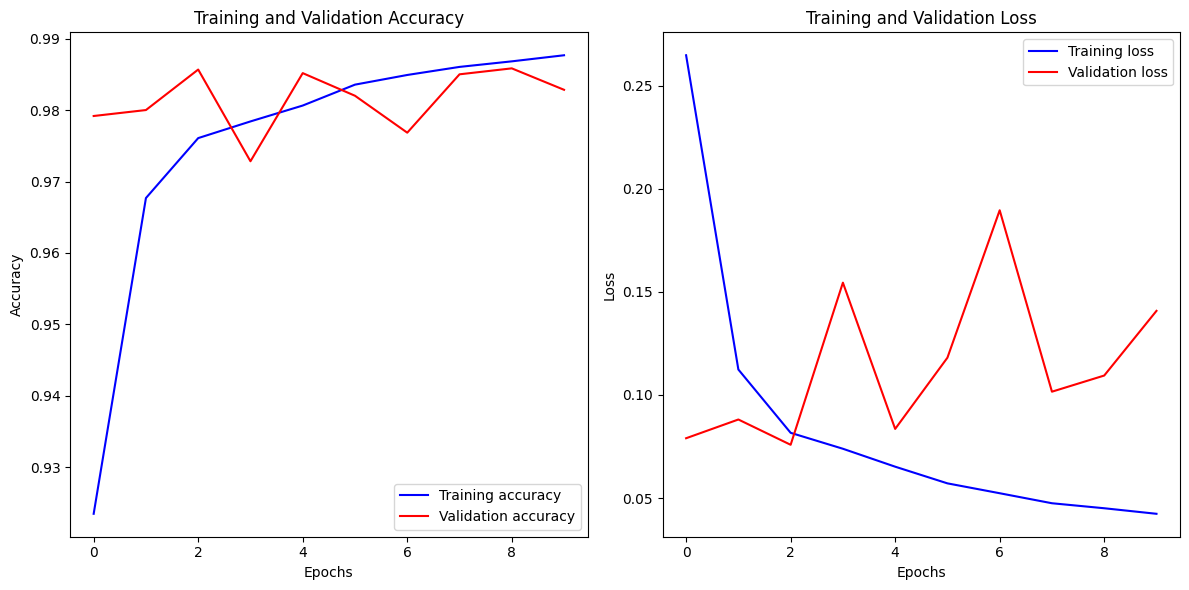

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.figure(figsize=(12, 6))

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()

In [20]:
y_pred = model.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

313/313 [==============================] - 36s 116ms/step


Text(158.22222222222223, 0.5, 'Truth Values')

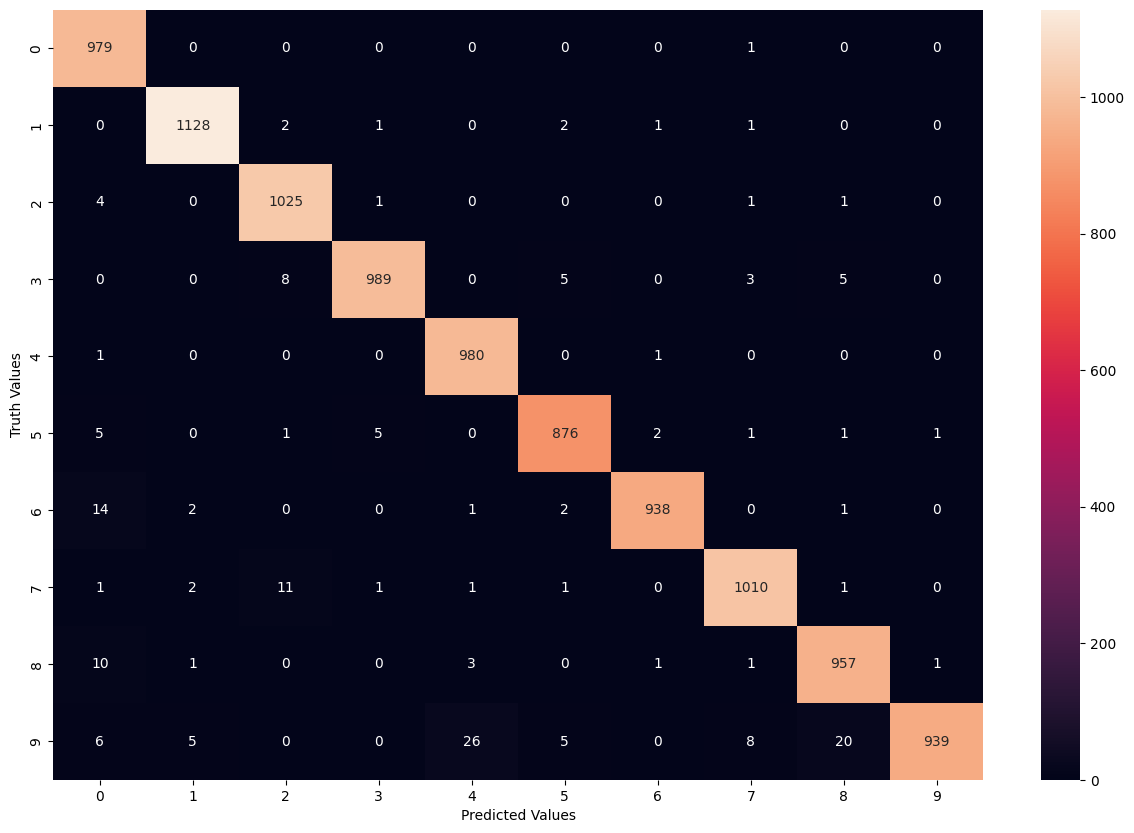

In [29]:
plt.figure(figsize = (15,10))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Values')
plt.ylabel('Truth Values')

Checking the Model with predictions

313/313 [==============================] - 29s 92ms/step
Predicted Value:  4
Successful prediction


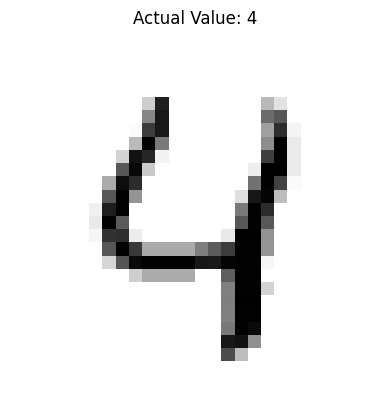

In [22]:
plt.imshow(x_test[4],cmap='gray_r')
plt.title('Actual Value: {}'.format(y_test[4]))
prediction=model.predict(x_test)

plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[4]))
if(y_test[4]==(np.argmax(prediction[4]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')


313/313 [==============================] - 31s 98ms/step
Predicted Value:  9
Successful prediction


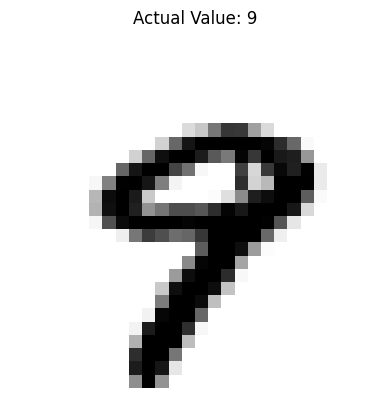

In [24]:
plt.imshow(x_test[9],cmap='gray_r')
plt.title('Actual Value: {}'.format(y_test[9]))
prediction=model.predict(x_test)

plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[9]))
if(y_test[9]==(np.argmax(prediction[9]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')